In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sin, cos, sqrt, atan2
import scipy 
from scipy.stats.stats import pearsonr
import datetime
import calendar

In [105]:
df = pd.read_csv('train.csv', nrows=2000000)

In [640]:
#df.describe()

In [59]:
# Cleaning of Data

In [107]:
df = df[df['fare_amount']>2.5]
df = df[(df['passenger_count']<8) & (df['passenger_count']>0)]
df = df[(df['pickup_latitude']<=41.65) & (df['pickup_latitude']>=40.55) & (df['dropoff_latitude']<=41.65) & (df['dropoff_latitude']>=40.55) &  
            (df['pickup_longitude']<=-72.95) & (df['pickup_longitude']>=-74.25) & (df['dropoff_longitude']<=-72.95) & (df['dropoff_longitude']>=-74.25)]

In [108]:
df = df.reset_index(drop=True)

In [109]:
def euclidean_dist(df):
    euc = []
    for i in range(len(df)):
        x1 = df['pickup_latitude'][i]
        x2 = df['dropoff_latitude'][i]
        y1 = df['pickup_longitude'][i]
        y2 = df['dropoff_longitude'][i]
    
        d = np.sqrt((y2-y1)**2 + (x2-x1)**2)
        euc.append(d)
    return euc

In [110]:
euc = euclidean_dist(df)

In [111]:
df['dist_euc'] = euc

In [112]:
def extractDate(df):
    year = []
    mon = []
    date = []
    for i in range(len(df)):
        y = df['pickup_datetime'][i][0:4]
        m = df['pickup_datetime'][i][5:7]
        d = df['pickup_datetime'][i][8:10]
        year.append(int(y))
        mon.append(int(m))
        date.append(int(d))
    return year, mon, date

In [113]:
year, mon, day = extractDate(df)

In [114]:
df['year']=year
df['month']=mon
df['day']=day

In [115]:
def calcHour(df):
    hour = []
    for i in range(len(df)):
        a = df['pickup_datetime'][i][11:13]
        hour.append(int(a))
    return hour

In [116]:
hour=calcHour(df)
df['hour']=hour

In [117]:
def distance_miles(df):
    dist = []
    for i in range(len(df)):
        lat1 = df['pickup_latitude'][i]
        lat2 = df['dropoff_latitude'][i]
        lon1 = df['pickup_longitude'][i]
        lon2 = df['dropoff_longitude'][i]
        p = 0.017453292519943295
        a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
        dist.append(0.6213712 * 12742 * np.arcsin(np.sqrt(a)))
    return dist

In [118]:
dist_miles = distance_miles(df)

In [119]:
df['dist_miles'] = dist_miles

In [120]:
df = df.reset_index(drop=True)

In [461]:
def getDayFromDate(df):
    dayList = []
    for i in range(len(df)):
        y = df['year'][i]
        m = df['month'][i]
        d = df['day'][i]
        ans = datetime.date(y, m, d)
        dayList.append(calendar.day_name[ans.weekday()])
    return dayList

In [463]:
days = getDayFromDate(df)

In [220]:
df['week_days'] = days

In [466]:
def getWeekNum(df):
    week_num = []
    for i in range(len(df)):
        if df['day'][i] > 0 and df['day'][i] < 8:
            week_num.append('week_1')
        elif df['day'][i] >7 and df['day'][i] < 15:
            week_num.append('week_2')
        elif df['day'][i] >14 and df['day'][i] < 22:
            week_num.append('week_3')
        elif df['day'][i] >21 and df['day'][i] < 32:
            week_num.append('week_4')
    return week_num

In [467]:
weekNo = getWeekNum(df)

In [473]:
df['week_num'] = weekNo

In [121]:
# Question 2

In [122]:
# Pearson Corr between Euclidean distance of the ride and the taxi fare

In [124]:
corrDistFare = pearsonr(df['fare_amount'], df['dist_euc'])

In [125]:
corrDistFare

(0.8278540392859857, 0.0)

In [126]:
# Pearson Corr between time of day and distance traveled

In [128]:
corrTimeDist = pearsonr(df['hour'], df['dist_miles'])

In [129]:
corrTimeDist

(-0.029662434692244256, 0.0)

In [41]:
# Pearson Corr between time of day and the taxi fare

In [130]:
corrTimeFare = pearsonr(df['hour'], df['fare_amount'])

In [131]:
corrTimeFare

(-0.018690152256322742, 1.1117309905038798e-149)

In [641]:
#df.head()

In [132]:
# Question 3

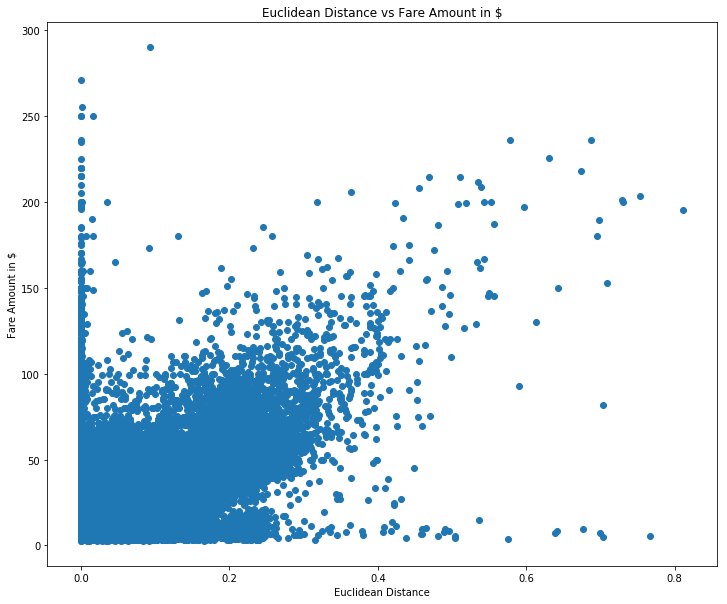

In [614]:
plt.figure(figsize=(12,10))
plt.xlabel('Euclidean Distance')
plt.ylabel('Fare Amount in $')
plt.title('Euclidean Distance vs Fare Amount in $')
plt.scatter(df['dist_euc'], df['fare_amount'])

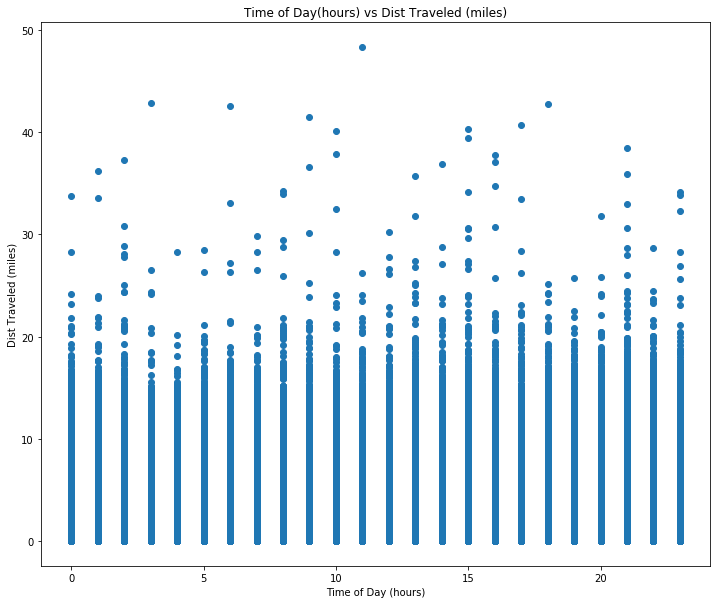

In [621]:
plt.figure(figsize=(12,10))
plt.xlabel('Time of Day (hours)')
plt.ylabel('Dist Traveled (miles)')
plt.title('Time of Day(hours) vs Dist Traveled (miles)')
plt.scatter(df['hour'], df['dist_miles'])

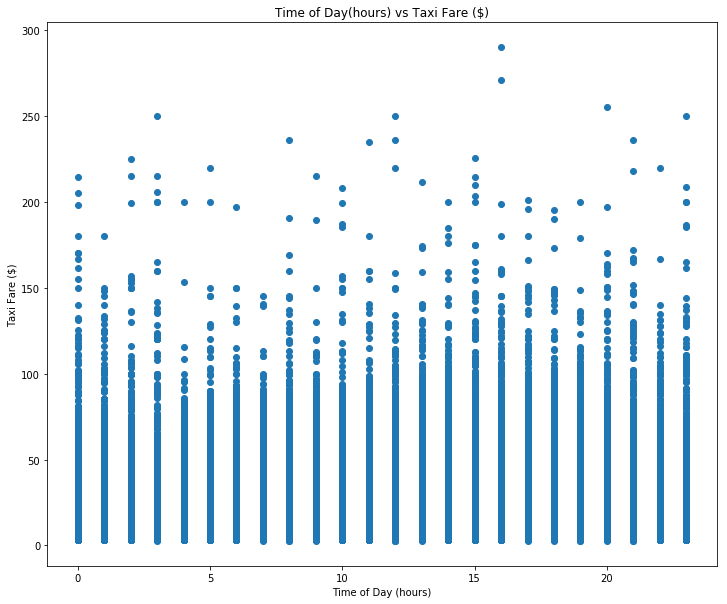

In [618]:
plt.figure(figsize=(12,10))
plt.xlabel('Time of Day (hours)')
plt.ylabel('Taxi Fare ($)')
plt.title('Time of Day(hours) vs Taxi Fare ($)')
plt.scatter(df['hour'], df['fare_amount'])

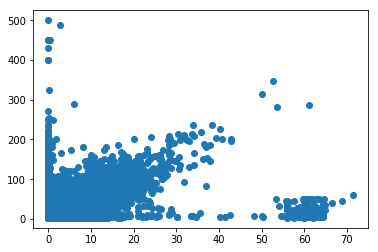

In [136]:
plt.scatter(df['dist_miles'], df['fare_amount'])

In [137]:
# Cleaning of Data after observing the correlation graphs

In [148]:
df = df[df['fare_amount']<300]
df = df[df['dist_miles']<50]

In [149]:
df = df.reset_index(drop=True)

In [150]:
# Generating the Correlation again

In [151]:
corrDistFare_2 = pearsonr(df['fare_amount'], df['dist_euc'])

In [152]:
corrDistFare_2

(0.869867819586228, 0.0)

In [153]:
corrTimeDist_2 = pearsonr(df['hour'], df['dist_miles'])

In [154]:
corrTimeDist_2

(-0.0308288137384207, 0.0)

In [155]:
corrTimeFare_2 = pearsonr(df['hour'], df['fare_amount'])

In [156]:
corrTimeFare_2

(-0.018666665388824912, 2.752617764965889e-149)

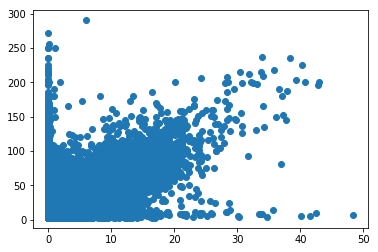

In [157]:
plt.scatter(df['dist_miles'], df['fare_amount'])

In [163]:
###########################

In [ ]:
# Question 4

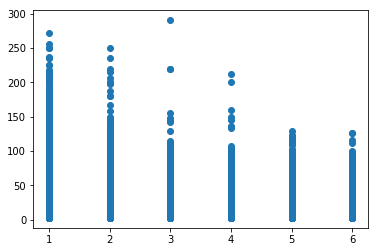

In [161]:
plt.scatter(df['passenger_count'], df['fare_amount'])

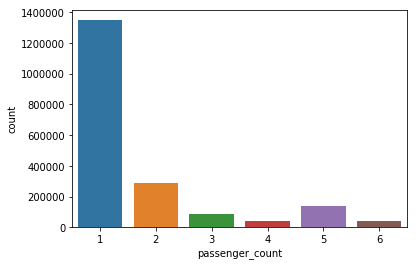

In [162]:
sns.countplot(df['passenger_count'])
# The maximum number of rides are with a single passenger

In [158]:
def airport_PickDrop(df):
    air = []
    for i in range(len(df)):
        #JFK Drop
        if df['dropoff_latitude'][i] <= 40.6613 and df['dropoff_latitude'][i] >= 40.6213 and df['dropoff_longitude'][i] <= -73.7721 and df['dropoff_longitude'][i] >= -73.7841:
            air.append(1)
        #JFK Pickup
        elif df['pickup_latitude'][i] <= 40.6613 and df['pickup_latitude'][i] >= 40.6213 and df['pickup_longitude'][i] <= -73.7721 and df['pickup_longitude'][i] >= -73.7841:
            air.append(1)
        #LJA Drop
        elif df['dropoff_latitude'][i] <= 40.78 and df['dropoff_latitude'][i] >= 40.768 and df['dropoff_longitude'][i] <= -73.858 and df['dropoff_longitude'][i] >= -73.887:
            air.append(1)
        #LJA Pickup
        elif df['pickup_latitude'][i] <= 40.78 and df['pickup_latitude'][i] >= 40.768 and df['pickup_longitude'][i] <= -73.858 and df['pickup_longitude'][i] >= -73.887:
            air.append(1)
        #NWK Drop
        elif df['dropoff_latitude'][i] <= 40.708 and df['dropoff_latitude'][i] >= 40.676 and df['dropoff_longitude'][i] <= -74.172 and df['dropoff_longitude'][i] >= -74.192:
            air.append(1)
        #NWK Pickup
        elif df['pickup_latitude'][i] <= 40.708 and df['pickup_latitude'][i] >= 40.676 and df['pickup_longitude'][i] <= -74.172 and df['pickup_longitude'][i] >= -74.192:
            air.append(1)
        #Not an airport Pickup/Drop
        else:
            air.append(0)
    return air

In [159]:
airport = airport_PickDrop(df)

In [160]:
df['airport'] = airport

In [479]:
def taxi_newyear(df):
    ny = []
    for i in range(len(df)):
        if((df['month'][i] == 12) or (df['month'][i] == 1)):
            if df['day'][i] in [24,25,26,27,28,29,30,31,1]:
                ny.append(1)
            else:
                ny.append(0)
        else:
            ny.append(0)
    return ny

In [480]:
ny_taxi = taxi_newyear(df)

In [482]:
df['newyear_ride'] = ny_taxi

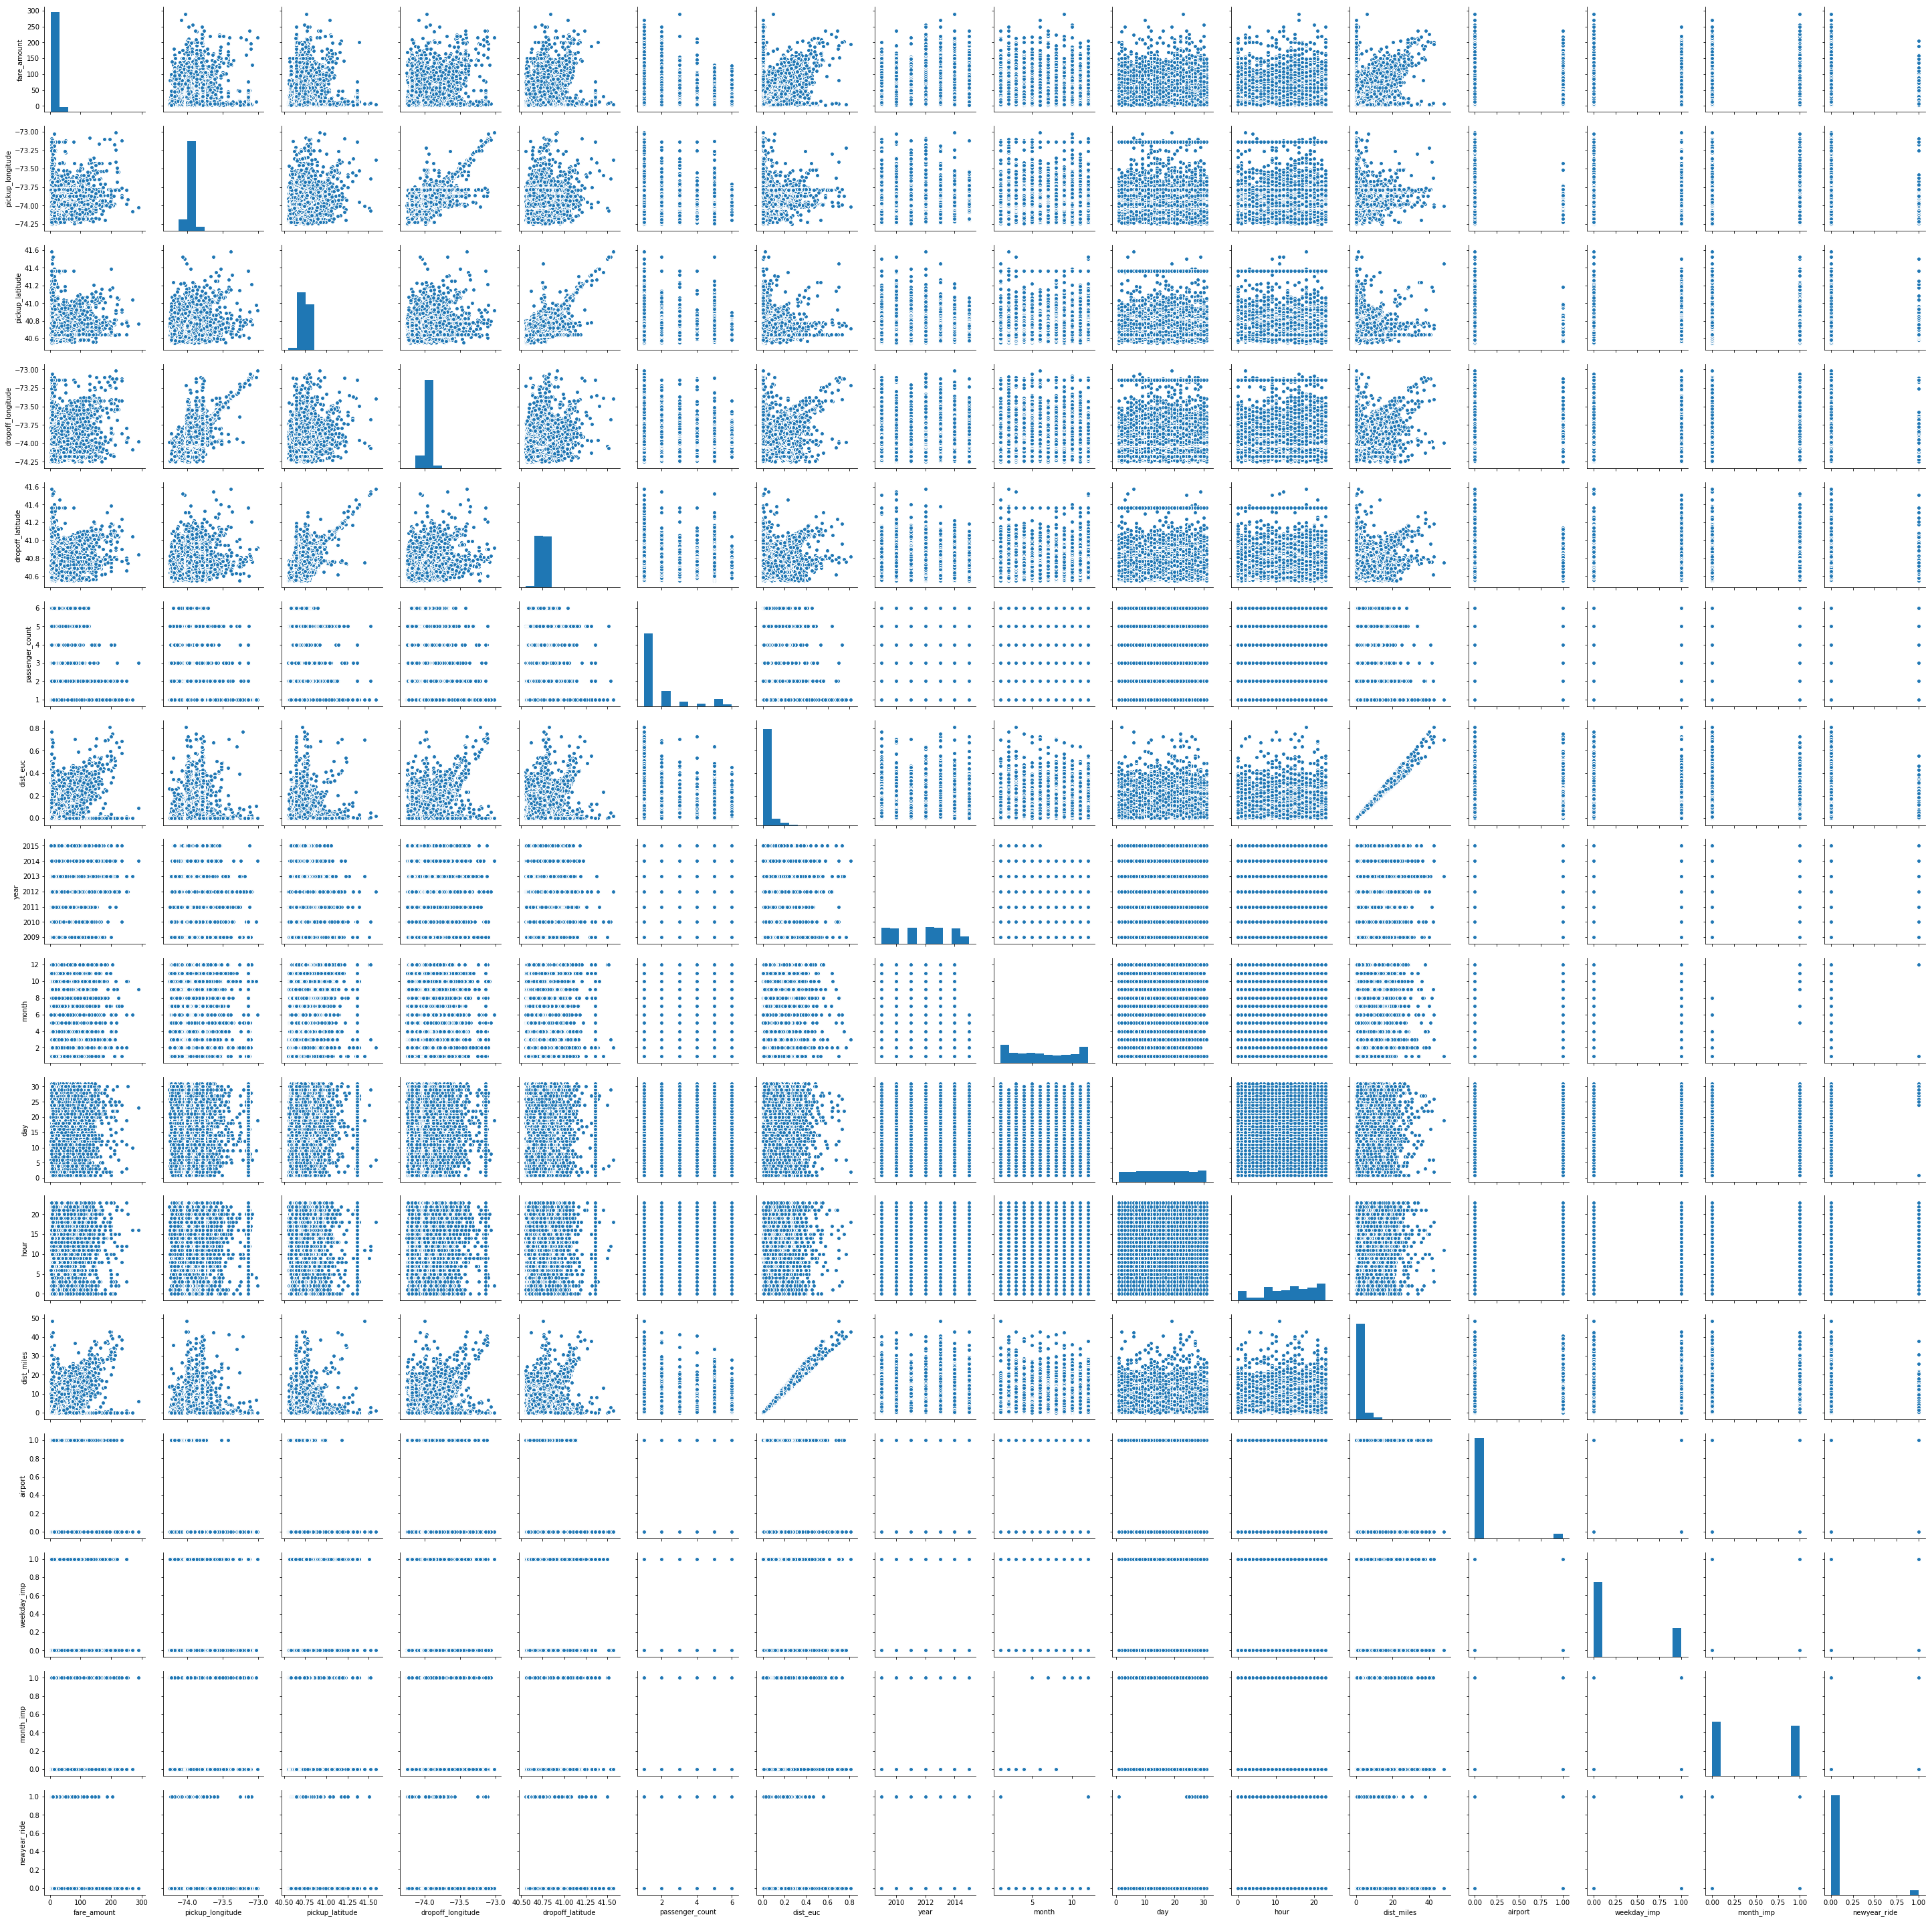

In [613]:
sns.pairplot(df)

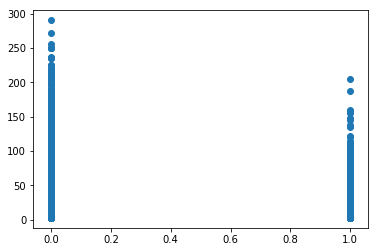

In [484]:
plt.scatter(df['newyear_ride'], df['fare_amount'])

In [485]:
df['newyear_ride'].value_counts()

0    1857537
1      85544
Name: newyear_ride, dtype: int64

In [631]:
def seasons(df):
    season = []
    for i in range(len(df)):
        if df['month'][i] in [8,9]:
            season.append('fall')
        elif df['month'][i] in [10,11,12,1,2]:
            season.append('winter')
        elif df['month'][i] in [3,4]:
            season.append('spring')
        elif df['month'][i] in [5,6,7]:
            season.append('summer')
    return season

In [634]:
season = seasons(df)

In [635]:
df['seasons'] = season

Text(0.5,1,'Seasons vs Number of Taxis')

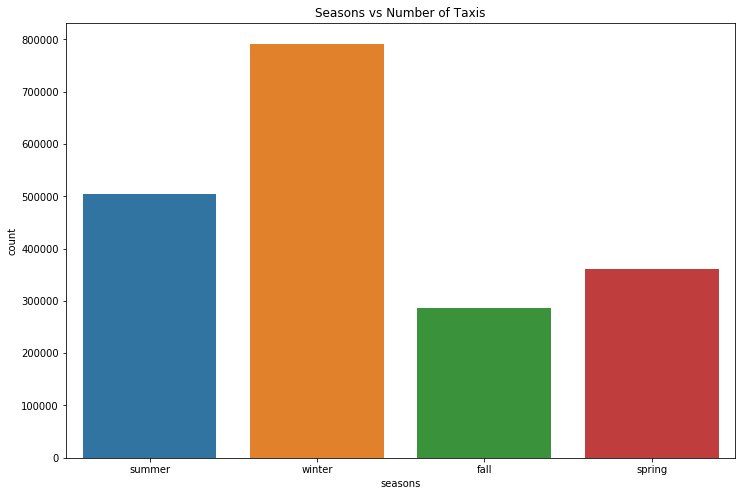

In [639]:
plt.figure(figsize=(12,8))
sns.countplot(df['seasons'])
plt.title('Seasons vs Number of Taxis')

In [486]:
tripsForNYEve = df.groupby(['newyear_ride'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})

Text(0.5,1,'Newyear_Eve vs Avg Fare Amount')

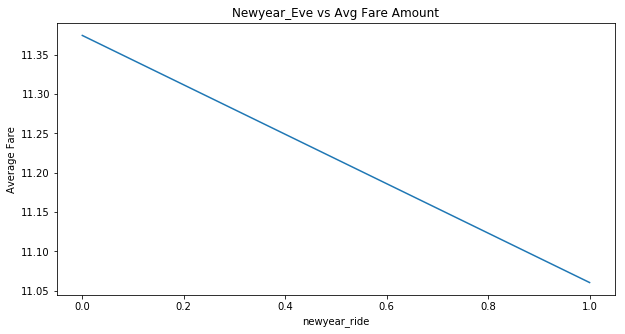

In [489]:
plt.figure(figsize=(10,5))
#sns.barplot(x='newyear_ride', y='avg_fare_amount', data = tripsForNYEve)
plt.plot(tripsForNYEve['newyear_ride'], tripsForNYEve['avg_fare_amount'])
plt.xlabel('newyear_ride')
plt.ylabel('Average Fare')
plt.title('Newyear_Eve vs Avg Fare Amount')

In [182]:
df_copy = df

In [166]:
df['airport'].value_counts()

0    1858184
1      84897
Name: airport, dtype: int64

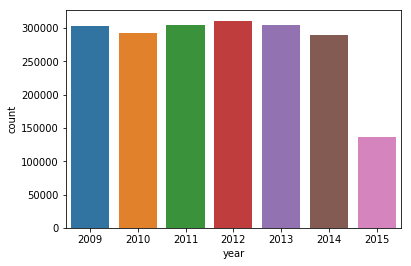

In [167]:
sns.countplot(df['year'])

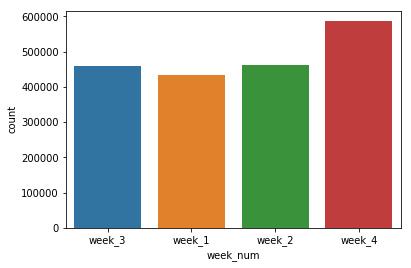

In [637]:
sns.countplot(df['week_num'])

In [474]:
tripsPerWeek = df.groupby(['week_num'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})

Text(0.5,1,'Week Num vs Avg Fare Amount')

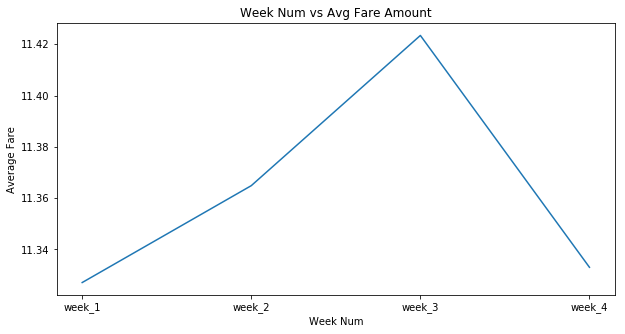

In [475]:
plt.figure(figsize=(10,5))
#sns.barplot(x='month', y='avg_fare_amount', data = tripsPerWeek)
plt.plot(tripsPerWeek['week_num'], tripsPerWeek['avg_fare_amount'])
plt.xlabel('Week Num')
plt.ylabel('Average Fare')
plt.title('Week Num vs Avg Fare Amount')

Text(0.5,1,'Years vs Avg Fare Amount')

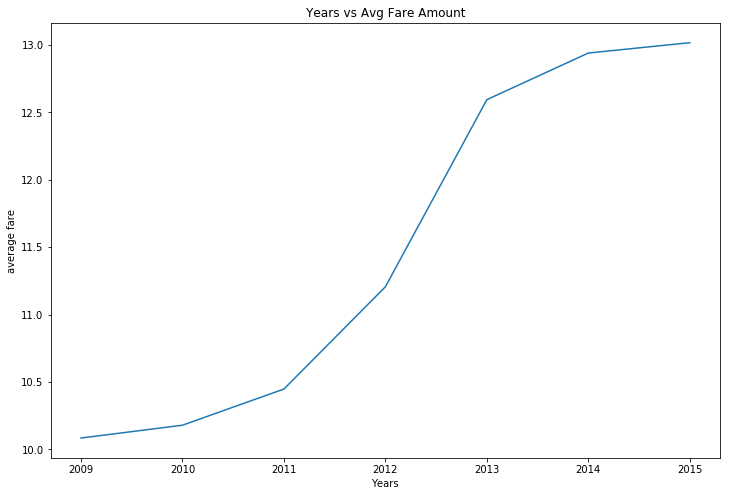

In [624]:
plt.figure(figsize=(12,8))
plt.plot(tripsPerYear['year'], tripsPerYear['avg_fare_amount'])
plt.xlabel('Years')
plt.ylabel('average fare')
plt.title('Years vs Avg Fare Amount')
# From the graph it can be interpreted that the fares have increased over the years

Text(0.5,1,'Month vs Number of Rides')

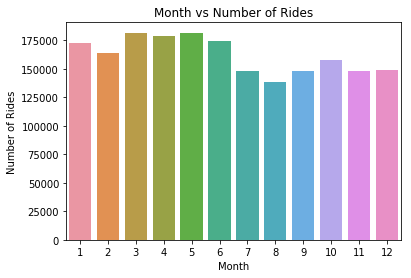

In [191]:
sns.countplot(df['month'])
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Month vs Number of Rides')
# Can be observed that from July to December the number of rides are less as compared to January to June 

In [388]:
tripsPerMonth = df.groupby(['month'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})

Text(0.5,1,'Month vs Avg Fare Amount')

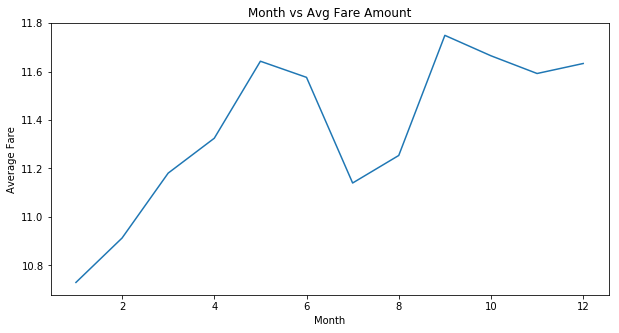

In [392]:
plt.figure(figsize=(10,5))
#sns.barplot(x='month', y='avg_fare_amount', data = tripsPerMonth)
plt.plot(tripsPerMonth['month'], tripsPerMonth['avg_fare_amount'])
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.title('Month vs Avg Fare Amount')

Text(0.5,1,'Days vs Number of Rides')

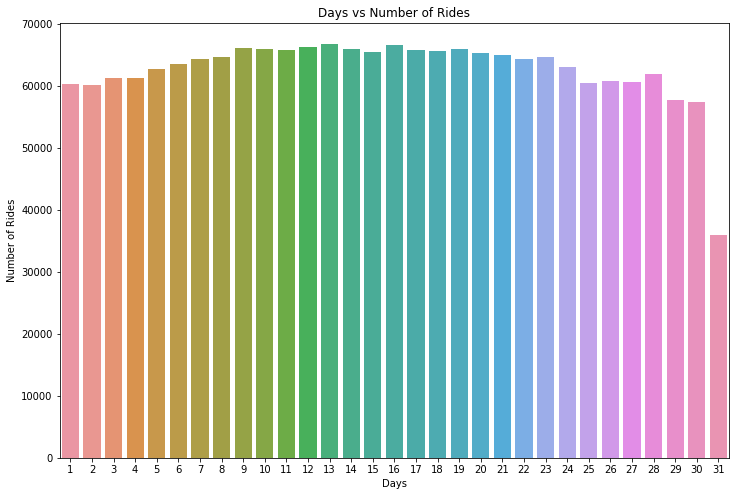

In [626]:
plt.figure(figsize=(12,8))
sns.countplot(df['day'])
plt.xlabel('Days')
plt.ylabel('Number of Rides')
plt.title('Days vs Number of Rides')
# Can be obderved that the number of rides are maximum in the mid month especially after the first week. Then it decreases by the last one week.

In [369]:
tripsPerDay = df.groupby(['day'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})

Text(0.5,1,'Days vs Avg Fare Amount')

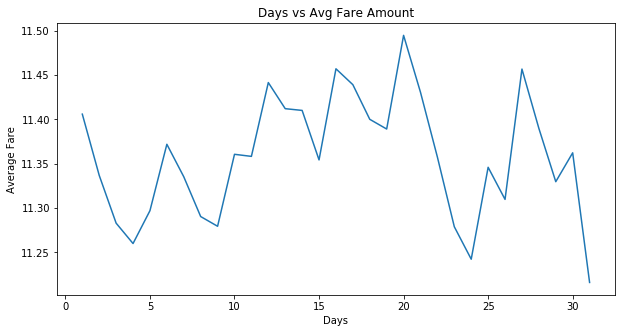

In [383]:
plt.figure(figsize=(10,5))
#sns.barplot(x='day', y='avg_fare_amount', data = tripsPerDay)
plt.plot(tripsPerDay['day'], tripsPerDay['avg_fare_amount'])
plt.xlabel('Days')
plt.ylabel('Average Fare')
plt.title('Days vs Avg Fare Amount')

In [629]:
df.head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_euc,year,month,day,hour,dist_miles,airport,week_days,weekday_imp,month_imp,week_num,newyear_ride
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1,0.009436,2009,6,15,17,0.640487,0,Monday,0,0,week_3,0


Text(0.5,1,'Hours vs Number of Rides')

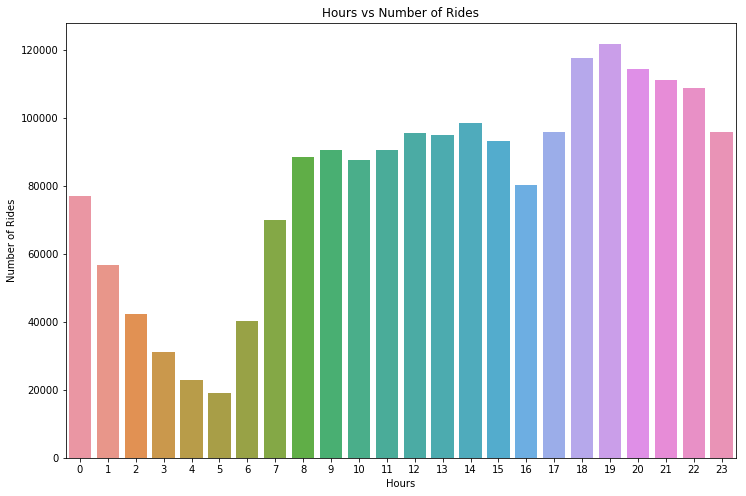

In [625]:
plt.figure(figsize=(12,8))
sns.countplot(df['hour'])
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.title('Hours vs Number of Rides')
# Can be seen
# 1) Number of rides suddenly increase during 7-8 AM and then remains constant
# 2) Number of rides are maximum during the end of office hours at 6-8 PM and then decreases

In [384]:
tripsPerHour = df.groupby(['hour'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})

Text(0.5,1,'Hour vs Avg Fare Amount')

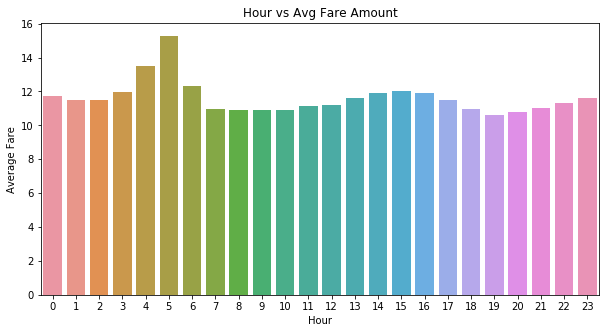

In [387]:
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='avg_fare_amount', data = tripsPerHour)
#plt.plot(tripsPerHour['hour'], tripsPerHour['avg_fare_amount'])
plt.xlabel('Hour')
plt.ylabel('Average Fare')
plt.title('Hour vs Avg Fare Amount')

'\nfds\n'

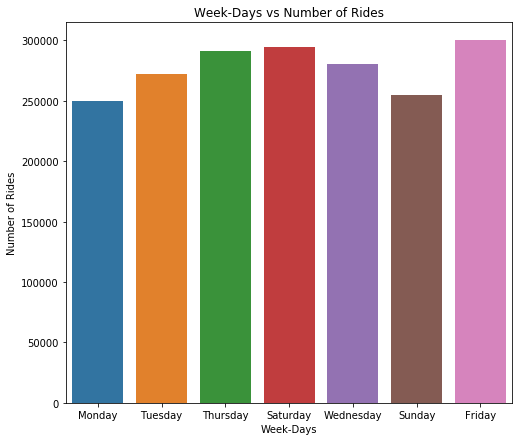

In [224]:
plt.figure(figsize=(8,7))
sns.countplot(df['week_days'])
plt.xlabel('Week-Days')
plt.ylabel('Number of Rides')
plt.title('Week-Days vs Number of Rides')
# Can be seen:
# 1) Max number of Rides on - Friday, Saturday 

In [227]:
farePerWeekDay = df.groupby(['week_days'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})

Text(0.5,1,'Week-Days vs Avg Fare Amount')

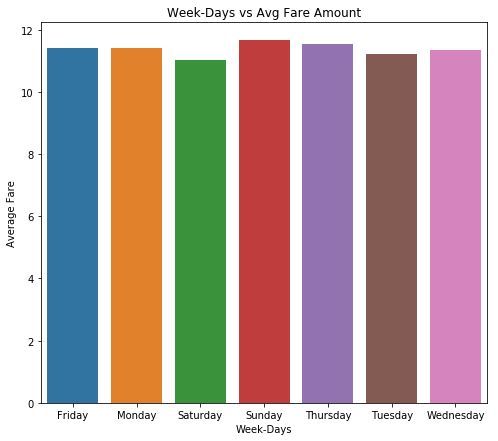

In [232]:
plt.figure(figsize=(8,7))
sns.barplot(x='week_days', y='avg_fare_amount', data=farePerWeekDay)
plt.xlabel('Week-Days')
plt.ylabel('Average Fare')
plt.title('Week-Days vs Avg Fare Amount')
# Can be seen:
# Fares slightly higher on Friday and Sunday

In [ ]:
# After Observing the above plots, changing data for the Model to learn

In [366]:
def markImp_WeekDays(df):
    weekdays_imp = []
    for i in range(len(df)):
        if df['week_days'][i] == 'Sunday' or df['week_days'][i] == 'Thursday':
            weekdays_imp.append(1)
        else:
            weekdays_imp.append(0)
    return weekdays_imp
            

In [367]:
wd_imp = markImp_WeekDays(df)

In [395]:
df['weekday_imp'] = wd_imp

In [393]:
def markImp_month(df):
    month_imp = []
    for i in range(len(df)):
        if df['month'][i] in [5,7,9,10,11,12]:
            month_imp.append(1)
        else:
            month_imp.append(0)
    return month_imp

In [394]:
monthImp = markImp_month(df)

In [396]:
df['month_imp'] = monthImp

In [236]:
# Applying Machine Learning Models

In [397]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_euc', 'year', 'month', 'day', 'hour',
       'dist_miles', 'airport', 'week_days', 'weekday_imp', 'month_imp'],
      dtype='object')

In [595]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [596]:
lm = LinearRegression()

In [399]:
X = df[['dist_miles', 'year', 'weekday_imp', 'month_imp', 'airport']]

In [400]:
y = df['fare_amount']

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [402]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [403]:
predictions = lm.predict(X_test)

In [404]:
err = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [405]:
err

4.642155670150714

In [597]:
df_test = pd.read_csv('test.csv')

In [598]:
dist_test = distance_miles(df_test)

In [599]:
df_test['dist_miles'] = dist_test

In [600]:
y, m, d = extractDate(df_test)
df_test['year'] = y
df_test['month'] = m
df_test['day'] = d

In [601]:
hr = calcHour(df_test)
df_test['hour'] = hr

In [602]:
air = airport_PickDrop(df_test)
df_test['airport'] = air

In [603]:
mon_imp = markImp_month(df_test)
df_test['month_imp'] = mon_imp

In [604]:
days = getDayFromDate(df_test)
df_test['week_days'] = days

In [605]:
wdImp = markImp_WeekDays(df_test)
df_test['weekday_imp'] = wdImp

In [606]:
df_test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'dist_miles', 'year', 'month', 'day', 'hour', 'airport', 'month_imp',
       'week_days', 'weekday_imp'],
      dtype='object')

In [607]:
X_t = df_test[['dist_miles', 'hour', 'year', 'weekday_imp', 'month_imp', 'airport']]

In [437]:
predictions_test = lm.predict(X_t)

In [438]:
len(predictions_test)

9914

In [439]:
final = pd.DataFrame()
final['key'] = df_test['key']
final['fare_amount'] = predictions_test

In [440]:
# change name
##
##
##

In [441]:
final.to_csv('predictions.csv', index=False)

In [312]:
######################################

In [313]:
# Applying Booster

In [315]:
import xgboost as xg

In [588]:
X = df[['dist_miles', 'hour', 'year', 'weekday_imp', 'month_imp', 'airport']]
y = df['fare_amount']

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [590]:
booster1 = xg.XGBRegressor(n_estimator=100,learning_rate=0.1, gamma=0, subsample=0.75,colsample_bytree=1,max_depth=10)

In [591]:
booster1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimator=100,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.75)

In [592]:
predictions = booster1.predict(X_test)

In [593]:
err = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [608]:
err

4.247516016085771

In [609]:
predictions_test = booster1.predict(X_t)

In [610]:
len(predictions_test)

9914

In [611]:
final = pd.DataFrame()
final['key'] = df_test['key']
final['fare_amount'] = predictions_test

In [612]:
final.to_csv('predictions.csv', index=False)

In [540]:
# Implementing DecisionTreeRegressor

In [541]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_euc,year,month,day,hour,dist_miles,airport,week_days,weekday_imp,month_imp,week_num,newyear_ride
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009,6,15,17,0.640487,0,Monday,0,0,week_3,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010,1,5,16,5.250670,0,Tuesday,0,0,week_1,0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011,8,18,0,0.863411,0,Thursday,1,0,week_3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012,4,21,4,1.739386,0,Saturday,0,0,week_3,0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010,3,9,7,1.242218,0,Tuesday,0,0,week_2,0


In [565]:
from sklearn.tree import DecisionTreeRegressor

In [566]:
regr_2 = DecisionTreeRegressor(max_depth=10)

In [567]:
X = df[['dist_miles', 'year', 'weekday_imp', 'month_imp', 'airport']]
y = df['fare_amount']

In [568]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [569]:
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [570]:
pred_reg = regr_2.predict(X_test)

In [571]:
err = np.sqrt(metrics.mean_squared_error(y_test, pred_reg))

In [572]:
err

4.256812519403117

In [582]:
X_t = df_test[['dist_miles', 'year', 'airport']]

In [583]:
pred_reg_test = regr_2.predict(X_t)

In [584]:
len(pred_reg_test)

9914

In [585]:
final = pd.DataFrame()
final['key'] = df_test['key']
final['fare_amount'] = pred_reg_test

In [586]:
final.to_csv('predictions.csv', index=False)